In [1]:
from qiskit import QuantumProgram
from qiskit.tools.visualization import plot_histogram
import Qconfig
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Q = QuantumProgram()
Q.set_api(Qconfig.APItoken,Qconfig.config["url"])

In [3]:
q2 = Q.create_quantum_register("q2",2)
c2 = Q.create_classical_register("c2",2)

In [72]:
mX = Q.create_circuit('mX',[q2],[c2])
mX.h(q2[0])
mX.h(q2[1])
mX.measure(q2[0],c2[0])
mX.measure(q2[1],c2[1])

# Create Bell states

# bell state from |00> 
b00 = Q.create_circuit("b00",[q2],[c2])
# b00.x(q2[1])
b00.h(q2[1])
b00.cx(q2[1], q2[0])
Q.add_circuit("bX00",  b00 + mX )

# Bell state from |01> 
b10 = Q.create_circuit("b10",[q2],[c2])
b10.x(q2[1])
b10.h(q2[1])
b10.cx(q2[1], q2[0])
Q.add_circuit("bX10",  b10 + mX )

running on backend: ibmqx_qasm_simulator


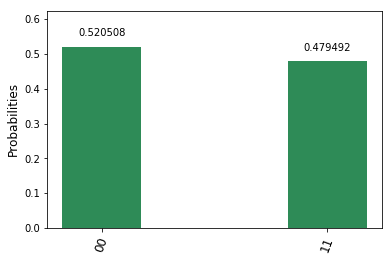

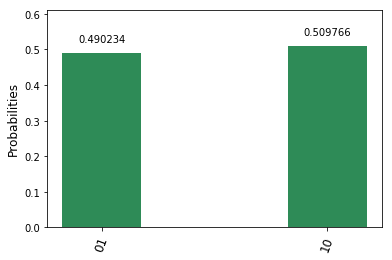

In [73]:
back = 'ibmqx_qasm_simulator'
# backend='ibmqx4'

result = Q.execute(["bX00","bX10"],backend=back,shots=1024,silent=False)
plot_histogram(result.get_counts("bX00"))
plot_histogram(result.get_counts("bX10"))